In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #for ignoring warning 
warnings.filterwarnings('ignore')

#request.get method is for requesting to site for data access
try:
    page=requests.get('https://www.sportskeeda.com/cricket/cricket-world-cup-winners') #send request to site 1step done website load it
except Exception as e:
    print("Error for Link or illegal for scraping")
    
print(page) #repose 200 means succefull u can do web scrping



<Response [200]>


In [2]:
#html parser
#create the object of BeautifulSoup class. here soup user defined object
soup=BeautifulSoup(page.text,'html.parser') #by using html.parser we converted html code into readable form
# above page link converted into  text by using page.text and than use html.parse 
#print(soup)

#Use of prettify() method : Its show the nicely aligning  the html code so that it can easily
#understand what are tag to we have and It is nicely align all the tag.
#use prettify() inbuilt method of BeautifulSoup class
#print(soup.prettify())  # used prettify for much more understandable form of  html code

#Scraping the cricket world cup  winner  :
'''This is the you Url i have scrap 
https://www.sportskeeda.com/cricket/cricket-world-cup-winners'''

#now lets take the number of pages we want to scrap

no_page=2
#Create a function name get_data()
def get_data(pageNo):
    r = requests.get('https://www.sportskeeda.com/cricket/cricket-world-cup-winners')
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)
#get_data(2)

In [3]:
#Extract all winner tables
tables=soup.find_all("table")
#tables

In [4]:
tables=tables[1]
rows=tables.find_all("tr")
rows


[<tr><td data-row="1"><strong>Year</strong></td><td data-row="1"><strong>Winner</strong></td><td data-row="1"><strong>Score</strong></td><td data-row="1"><strong>Runners-up</strong></td><td data-row="1"><strong>Score</strong></td><td data-row="1"><strong>Result</strong></td></tr>,
 <tr><td data-row="2">2019</td><td data-row="2"><a href="https://www.sportskeeda.com/team/england-cricket" style="color: rgb(17, 85, 204);" target="_blank"><strong>England</strong></a></td><td data-row="2">241</td><td data-row="2"><a href="https://www.sportskeeda.com/team/new-zealand-2" style="color: rgb(17, 85, 204);" target="_blank"><strong>New Zealand</strong></a></td><td data-row="2">241-8</td><td data-row="2">England won Super Over on boundary count</td></tr>,
 <tr><td data-row="3">2015</td><td data-row="3"><a href="https://www.sportskeeda.com/team/australian-cricket-team" style="color: rgb(17, 85, 204);" target="_blank"><strong>Australia</strong></a></td><td data-row="3">186–3</td><td data-row="3"><a hr

In [5]:
data_rows=rows[0:]

In [6]:
X=[]
for row in data_rows:
    #print(row.text)
    data=row.find_all("td")
    
    Year=data[0].text
    winner=data[1].text
    Score=data[2].text
    Runners_up=data[3].text
    Score=data[4].text
    Result=data[5].text
    print(Year,end=" ")
    print(winner,end=" ")
    print(Score,end=" ")
    print(Runners_up,end=" ")
    print(Score,end=" ")
    print(Result,end=" ")
    print()

Year Winner Score Runners-up Score Result 
2019 England 241-8 New Zealand 241-8 England won Super Over on boundary count 
2015 Australia 183 New Zealand 183 Australia won by 7 wickets 
2011 India 274–6 Sri Lanka 274–6 India won by 6 wickets 
2007 Australia 215–8 Sri Lanka 215–8 Australia won by 53 runs 
2003 Australia 234 India 234 Australia won by 125 runs 
1999 Australia 132 Pakistan 132 Australia won by 8 wickets 
1996 Sri Lanka 241 Australia 241 Sri Lanka won by 7 wickets 
1992 Pakistan 227 England 227 Pakistan won by 22 runs 
1987 Australia 246–8 England 246–8 Australia won by 7 runs 
1983 India 140 West Indies 140 India won by 43 runs 
1979 West Indies 194 England 194 West Indies won by 92 runs 
1975 West Indies 274 Australia 274 West Indies won by 17 runs 


In [7]:
def get_data(rows):
    alls = []#declare outer empty list
    for row in data_rows:
        #print(row.text)
        data=row.find_all("td")
        X=[]
        Year=data[0].text
        Winner=data[1].text
        Score=data[2].text
        Runners_up=data[3].text
        Score=data[4].text
        Result=data[5].text
        X.append(Year)
        X.append(Winner)
        X.append(Score)
        X.append(Runners_up)
        X.append(Score)
        X.append(Result)
        alls.append(X) 
    return alls
    '''
    print(Year,end=" ")
    print(winner,end=" ")
    print(Score,end=" ")
    print(Runners_up,end=" ")
    print(Score,end=" ")
    print(Result,end=" ")
    print()'''

In [8]:
#call in main program
results = [] 
n=len(data_rows)
for i in range(1, n+1):
    results.append(get_data(i)) #call function 
    
print(results)
print("total Rows : ",len(results))

[[['Year', 'Winner', 'Score', 'Runners-up', 'Score', 'Result'], ['2019', 'England', '241-8', 'New Zealand', '241-8', 'England won Super Over on boundary count'], ['2015', 'Australia', '183', 'New Zealand', '183', 'Australia won by 7 wickets'], ['2011', 'India', '274–6', 'Sri Lanka', '274–6', 'India won by 6 wickets'], ['2007', 'Australia', '215–8', 'Sri Lanka', '215–8', 'Australia won by 53 runs'], ['2003', 'Australia', '234', 'India', '234', 'Australia won by 125 runs'], ['1999', 'Australia', '132', 'Pakistan', '132', 'Australia won by 8 wickets'], ['1996', 'Sri Lanka', '241', 'Australia', '241', 'Sri Lanka won by 7 wickets'], ['1992', 'Pakistan', '227', 'England', '227', 'Pakistan won by 22 runs'], ['1987', 'Australia', '246–8', 'England', '246–8', 'Australia won by 7 runs'], ['1983', 'India', '140', 'West Indies', '140', 'India won by 43 runs'], ['1979', 'West Indies', '194', 'England', '194', 'West Indies won by 92 runs'], ['1975', 'West Indies', '274', 'Australia', '274', 'West In

In [9]:
import pandas as pd
flatten = lambda l: [item for sublist in l for item in sublist]
#print(results)
df = pd.DataFrame(flatten(results),columns=['Year','Winner','Score','Runners_up', 'Score','Result'])
#print(df)
#to write data from df to .csv file permanently
df.to_csv('world_cup_winners.csv', index=False, encoding='utf-8')

In [10]:
#Reading CSV File or load csv file use inbuilt method of pandas read_csv
#to read data from csv file and hold in user defined dataframe object df
df = pd.read_csv("world_cup_winners.csv")

In [11]:
df.head()

,Year,Winner,Score,Runners_up,Score.1,Result
0,Year,Winner,Score,Runners-up,Score,Result
1,2019,England,241-8,New Zealand,241-8,England won Super Over on boundary count
2,2015,Australia,183,New Zealand,183,Australia won by 7 wickets
3,2011,India,274–6,Sri Lanka,274–6,India won by 6 wickets
4,2007,Australia,215–8,Sri Lanka,215–8,Australia won by 53 runs


In [12]:
#now we can do analysis in this csv  file 
#if we want to see last 5 record we use
df.tail()

,Year,Winner,Score,Runners_up,Score.1,Result
164,1992,Pakistan,227,England,227,Pakistan won by 22 runs
165,1987,Australia,246–8,England,246–8,Australia won by 7 runs
166,1983,India,140,West Indies,140,India won by 43 runs
167,1979,West Indies,194,England,194,West Indies won by 92 runs
168,1975,West Indies,274,Australia,274,West Indies won by 17 runs


In [13]:
df #if we want to see full records

,Year,Winner,Score,Runners_up,Score.1,Result
0,Year,Winner,Score,Runners-up,Score,Result
1,2019,England,241-8,New Zealand,241-8,England won Super Over on boundary count
2,2015,Australia,183,New Zealand,183,Australia won by 7 wickets
3,2011,India,274–6,Sri Lanka,274–6,India won by 6 wickets
4,2007,Australia,215–8,Sri Lanka,215–8,Australia won by 53 runs
...,...,...,...,...,...,...
164,1992,Pakistan,227,England,227,Pakistan won by 22 runs
165,1987,Australia,246–8,England,246–8,Australia won by 7 runs
166,1983,India,140,West Indies,140,India won by 43 runs
167,1979,West Indies,194,England,194,West Indies won by 92 runs


In [14]:
#check Unique list of all winner from winner column or remove duplicates from winner column use in built method .unique()
print(df["Winner"].unique()) 
print(df["Winner"].dtypes)#to check datatype of winner column 

['Winner' 'England' 'Australia' 'India' 'Sri Lanka' 'Pakistan'
 'West Indies']
object


In [15]:
#now lets check if there is any null or not null value  
#to check we use in-build method is null and not null
df.isnull()
df.notnull()

,Year,Winner,Score,Runners_up,Score.1,Result
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
164,True,True,True,True,True,True
165,True,True,True,True,True,True
166,True,True,True,True,True,True
167,True,True,True,True,True,True


In [16]:
df.sort_values(["Year"], axis=0) #here we will get year column in ascending order ,similary we can do for decending 
#for decending put axis=1 or ascending =False


,Year,Winner,Score,Runners_up,Score.1,Result
168,1975,West Indies,274,Australia,274,West Indies won by 17 runs
142,1975,West Indies,274,Australia,274,West Indies won by 17 runs
129,1975,West Indies,274,Australia,274,West Indies won by 17 runs
38,1975,West Indies,274,Australia,274,West Indies won by 17 runs
116,1975,West Indies,274,Australia,274,West Indies won by 17 runs
...,...,...,...,...,...,...
26,Year,Winner,Score,Runners-up,Score,Result
39,Year,Winner,Score,Runners-up,Score,Result
130,Year,Winner,Score,Runners-up,Score,Result
156,Year,Winner,Score,Runners-up,Score,Result


In [17]:
df

,Year,Winner,Score,Runners_up,Score.1,Result
0,Year,Winner,Score,Runners-up,Score,Result
1,2019,England,241-8,New Zealand,241-8,England won Super Over on boundary count
2,2015,Australia,183,New Zealand,183,Australia won by 7 wickets
3,2011,India,274–6,Sri Lanka,274–6,India won by 6 wickets
4,2007,Australia,215–8,Sri Lanka,215–8,Australia won by 53 runs
...,...,...,...,...,...,...
164,1992,Pakistan,227,England,227,Pakistan won by 22 runs
165,1987,Australia,246–8,England,246–8,Australia won by 7 runs
166,1983,India,140,West Indies,140,India won by 43 runs
167,1979,West Indies,194,England,194,West Indies won by 92 runs


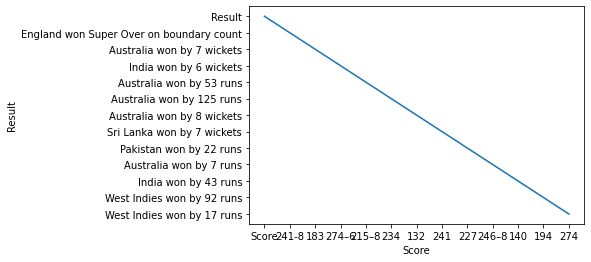

In [18]:
#line plot for Score and  result
sns.lineplot(data=df,x="Score",y="Result") #score here is input and result is target 
plt.show()

In [19]:
df.dtypes #for cheking data in df

Year          object
Winner        object
Score         object
Runners_up    object
Score.1       object
Result        object
dtype: object

In [20]:
#df=df.drop(df.index[0],inplace=True) #so o lebel is deleted from table and than 1 index will become o and if run again so 
#value of 1 index will  also be delete permanently u can see
df.head() #see 1st 2 got deleted




,Year,Winner,Score,Runners_up,Score.1,Result
0,Year,Winner,Score,Runners-up,Score,Result
1,2019,England,241-8,New Zealand,241-8,England won Super Over on boundary count
2,2015,Australia,183,New Zealand,183,Australia won by 7 wickets
3,2011,India,274–6,Sri Lanka,274–6,India won by 6 wickets
4,2007,Australia,215–8,Sri Lanka,215–8,Australia won by 53 runs


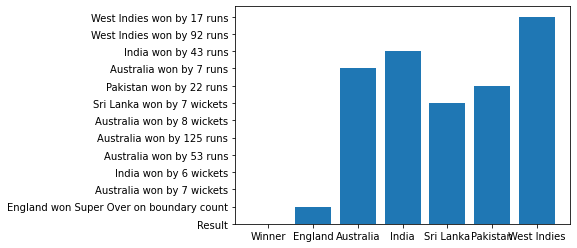

In [21]:
#now we want to make bar graph of winner and result so wen make this by using plt.bar
x=df['Winner']
y=df["Result"]
plt.bar(x,y)
plt.show()

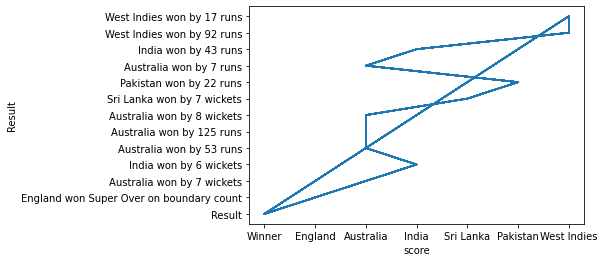

In [22]:
#line graph for  Score and result
x=df['Winner']
y=df['Result']
plt.xlabel('score')
plt.ylabel('Result')
plt.plot(x,y)
plt.show()

<AxesSubplot:>

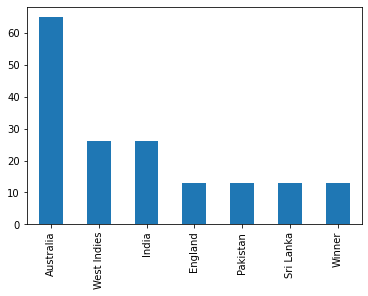

In [23]:
df
df["Winner"].value_counts().plot(kind="bar")